# Prawdopodobieństwo Choroby Henryka - Obliczenia
Ten notatnik podsumowuje statystyki zdrowia Henryka i stara sie odpowiedzieć na nastepujące pytania:
- Jakie jest prawdopodobieństwo, że Henryk będzie chory podczas odwiedzin swojego taty?
- Jakie jest prawdopodobieństwo, że Henryk będzie chory podczas odwiedzin swojego taty i dziadków?
- Jakie jest prawdopodobieństwo, że Henryk będzie chory kilka razy pod rząd podczas szeregu odwiedzin swojego taty?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

from scipy.stats import binom
from IPython.display import display, Markdown, Latex

In [2]:
# sickness parameters avg, 5 days of sickness every 2 months
sick_days_per_month_avg = 5
days_per_month_avg = 30.437

# sample size for binomial distribution, in binomial distribution this is number of trials
# for dad visits n=12, for family visits n=12+4
n_dad = 12
n_family = 12 + 4

# set numer of overlaps
overlaps_dad = 6
overlaps_family = 7
overlaps_in_a_raw = 4

# Dad's visits happen 1 per month
# probability assumption: Henry's 4 sick days will overlap with Dad's visit 
# Henry sick days statistics: Henry is typically ill once per 2 months for 4 days
# 4 days of unwell / avg 30.437 days in a month / 2 (once per 2 months) = ~ 0.07
# ref. https://www.britannica.com/science/time/Lengths-of-years-and-months
p_overlap = sick_days_per_month_avg / days_per_month_avg

# declare different number of tries. 12 for dad, 16 for family
k_dad = np.arange(0, n_dad)
k_family = np.arange(0, n_family)

# use binom.pmf to generate probability distribution
binomial_dad= binom.pmf(k=k_dad, n=n_dad, p=p_overlap)
binomial_family = binom.pmf(k=k_family, n=n_family, p=p_overlap)

# probability of several sickenss overlaps in a row
# follows power low
power_dad = np.array([])
for i in k_dad:
    if i > 0: 
        _p_next = power_dad[i-1] * p_overlap        
        power_dad = np.append(power_dad, _p_next)
    else:
        power_dad = np.append(power_dad, p_overlap)

# produce annotations
text_dad = f'- Prawdopodobieństwo tego, że choroba Henryka wypadnie akurat ' + '\n'  \
      + f'{overlaps_dad} razy (lub więcej) na czas spotk. z tatą to ok. ' \
      + f'{binomial_dad[overlaps_dad:n_dad].sum()*100:.1f}%' + '\n'  \
      + f'- Prawdopodobieństwo tego, że choroba Henryka na czas ' + '\n' \
      + f'{overlaps_dad} (lub więcej) spotkań z tatą nie jest dziełem przypadku to ok. '  \
      + f'{100 - binomial_dad[overlaps_dad:n_dad].sum()*100:.1f}%'

text_family = f'- Prawdopodobieństwo tego, że choroba Henryka wypadnie akurat ' + '\n' \
      + f'{overlaps_family} razy (lub więcej) na czas spotk. z tatą lub dziadkami to ok. '  \
      + f'{binomial_family[overlaps_family:n_family].sum()*100:.1f}%' + '\n'  \
      + f'- Prawdopodobieństwo tego, że choroba Henryka na czas ' + '\n' \
      + f'{overlaps_family} (lub więcej) spotkań z tatą lub dziadkami nie jest dziełem przypadku to ok. '  \
      + f'{100 - binomial_family[overlaps_family:n_family].sum()*100:.1f}%'

text_dad_in_a_row = f'- Prawdopodobieństwo tego, że Henryk będzie chory podczas odwiedzin taty' + '\n' \
      + f'{overlaps_in_a_raw} razy pod rząd wynosi ok. {power_dad[overlaps_in_a_raw-1]*100:.2f}%'

display(Markdown('-----'))
display(Markdown(text_dad))
display(Markdown('-----'))
display(Markdown(text_family))
display(Markdown('-----'))
display(Markdown(text_dad_in_a_row))
display(Markdown('-----'))


-----

- Prawdopodobieństwo tego, że choroba Henryka wypadnie akurat 
6 razy (lub więcej) na czas spotk. z tatą to ok. 0.7%
- Prawdopodobieństwo tego, że choroba Henryka na czas 
6 (lub więcej) spotkań z tatą nie jest dziełem przypadku to ok. 99.3%

-----

- Prawdopodobieństwo tego, że choroba Henryka wypadnie akurat 
7 razy (lub więcej) na czas spotk. z tatą lub dziadkami to ok. 0.9%
- Prawdopodobieństwo tego, że choroba Henryka na czas 
7 (lub więcej) spotkań z tatą lub dziadkami nie jest dziełem przypadku to ok. 99.1%

-----

- Prawdopodobieństwo tego, że Henryk będzie chory podczas odwiedzin taty
4 razy pod rząd wynosi ok. 0.07%

-----

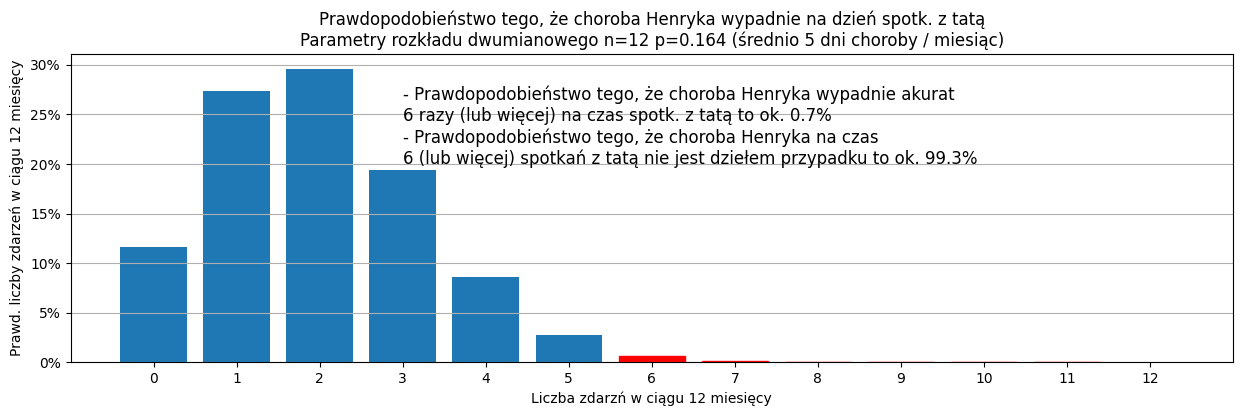

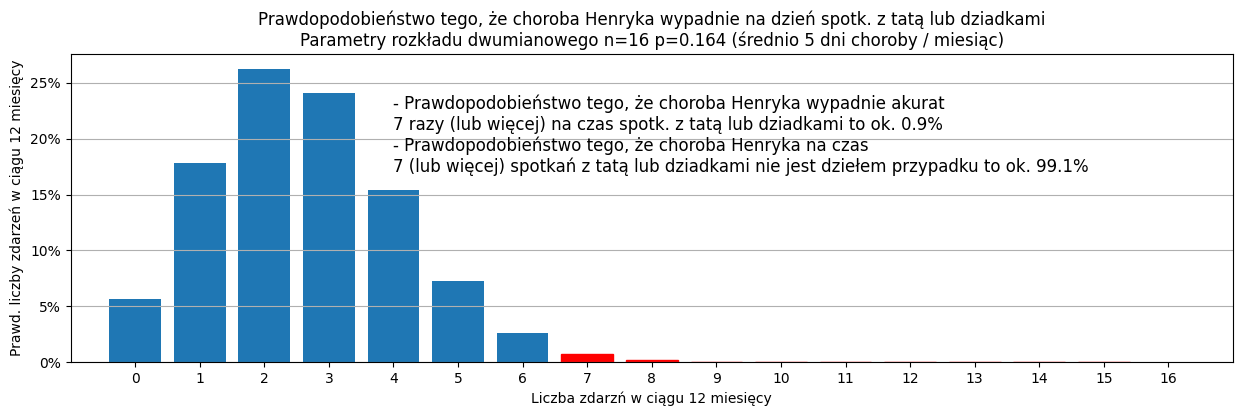

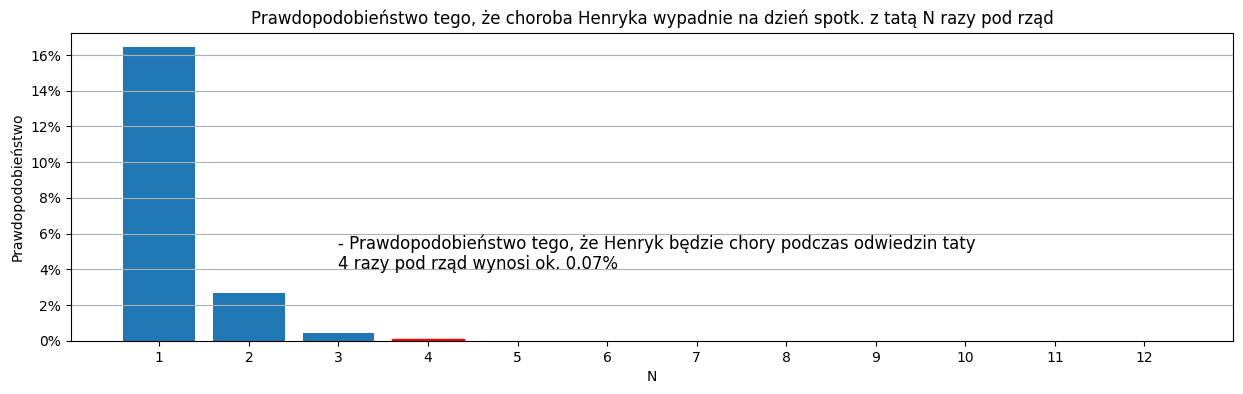

In [3]:
"""
plot all 3 distributions
- probability of Henry's sickness vs number of overlaps with his dad's visit
- probability of Henry's sickness vs number of overlaps with his dad's and grandparents' visit
- probability of Henry's sicness several times in a row over hist dad's visit
"""

# probability of Henry's sickness vs number of overlaps with his dad's visit
fig, ax = plt.subplots(figsize=(15,4))
bars = ax.bar(x=k_dad, height=binomial_dad*100)
for i, bar in enumerate(bars):
    if i >= overlaps_dad:
        bars[i].set_color('r')
ax.set_title(label=f'Prawdopodobieństwo tego, że choroba Henryka wypadnie na dzień spotk. z tatą' + '\n' 
          + f'Parametry rozkładu dwumianowego n={n_dad} p={p_overlap:.3f} (średnio {sick_days_per_month_avg} dni choroby / miesiąc)', fontsize=12)
ax.set_xticks(np.arange(0,n_dad+1,1))
ax.set_xlabel('Liczba zdarzń w ciągu 12 miesięcy')
ax.set_xbound(-1, n_dad+1)
ax.set_ylabel('Prawd. liczby zdarzeń w ciągu 12 miesięcy')
ax.yaxis.set_major_formatter('{x:.0f}%')
ax.grid(axis='y')
ax.text(3, 20, text_dad, fontsize=12)
plt.show()

# probability of Henry's sickness vs number of overlaps with his dad's and grandparents' visit
fig, ax = plt.subplots(figsize=(15,4))
bars = ax.bar(x=k_family, height=binomial_family*100)
for i, bar in enumerate(bars):
    if i >= overlaps_family:
        bars[i].set_color('r')
ax.set_title(label=f'Prawdopodobieństwo tego, że choroba Henryka wypadnie na dzień spotk. z tatą lub dziadkami' + '\n' 
          + f'Parametry rozkładu dwumianowego n={n_family} p={p_overlap:.3f} (średnio {sick_days_per_month_avg} dni choroby / miesiąc)', fontsize=12)
ax.set_xticks(np.arange(0,n_family+1,1))
ax.set_xlabel('Liczba zdarzń w ciągu 12 miesięcy')
ax.set_xbound(-1, n_family+1)
ax.set_ylabel('Prawd. liczby zdarzeń w ciągu 12 miesięcy')
ax.yaxis.set_major_formatter('{x:.0f}%')
ax.grid(axis='y')
ax.text(4, 17, text_family, fontsize=12)
plt.show()

# probability of Henry's sicness several times in a row over hist dad's visit
fig, ax = plt.subplots(figsize=(15,4))
bars = ax.bar(x=k_dad, height=power_dad*100)
for i, bar in enumerate(bars):
    if i == overlaps_in_a_raw - 1:
        bars[i].set_color('r')
ax.set_title(label=f'Prawdopodobieństwo tego, że choroba Henryka wypadnie na dzień spotk. z tatą N razy pod rząd' )
ax.set_xticks(np.arange(0,12,1))
ax.set_xticklabels( [x + 1 for x in ax.get_xticks()] )
ax.set_xlabel('N')
ax.set_ylabel('Prawdopodobieństwo')
ax.yaxis.set_major_formatter('{x:.0f}%')
ax.grid(axis='y')
ax.text(2, 4, text_dad_in_a_row, fontsize=12)
plt.show()

##### Założenia
- tata Henryka odwiedza go 1 raz w miesiącu
- dziadkowie Henryka odwiedzają go raz na 3 miesiące
- w roku wypada zatem łącznie 16 wizt taty Henryka i dziadków Henryka
- średnia liczba dni w miesiącu w roku wynosi $30.437$
- Henryk choruje średnio 5 dni na 2 miesiące, zatem $P(H_{chory}/mc)=\frac{5}{60.87}=0.082$ czyli $\approx 8\%$

##### Obserwacje:
- Prawdop. tego, że Henryk przypadkowo zachoruje w dniu wizyty swojego taty przynajmniej 3 razy w ciągu roku, wynosi około 7%
- Prawdop. tego, że choroba Henryka w dniu wizyty jego taty przynajmniej 3 razy w ciągu roku nie jest przypadkowa, wynosi około 93%
- Prawdop. tego, że Henryk przypadkowo zachoruje w dniu wizyty swojego taty lub dziadków przynajmniej 4 razy w ciągu roku, wynosi około 3,7%
- Prawdop. tego, że choroba Henryka w dniu wizyty jego taty lub dziadków przynajmniej 4 razy w ciągu roku nie jest przypadkowa, wynosi około 96,3%
- Prawdop. tego, że Henryk przypadkowo zachoruje w 2 kolejne wizyty swojego taty wynosi około 0.7%
- Prawdop. tego, że choroba Henryka w dniu wizyty jego taty 2 razy pod rząd nie jest przypadkowa wynosi ok. 99.3%